In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os

from tqdm.notebook import tqdm

from particle import Particle # https://github.com/scikit-hep/particle

import json


In [2]:
#f = uproot.open(f"input_files/numucc_event/nue_7049_1093_54700.root")
f = uproot.open(f"input_files/numucc_event/nue_0_0_1000.root")

track_shower_spacepoints_df = f["T_rec"].arrays(["x", "y", "z", "q", "real_cluster_id"], library="pd")
nu_trajectory_spacepoints_blob_df = f["T_rec_charge_blob"].arrays(["x", "y", "z", "q", "real_cluster_id"], library="pd")
t_rec_charge_df = f["T_rec_charge"].arrays(["x", "y", "z", "q", "cluster_id", "real_cluster_id"], library="pd")
cosmic_spacepoints_df = f["T_cluster"].arrays(["x", "y", "z", "q"], library="pd")

cosmic_spacepoints_xyz = np.column_stack((cosmic_spacepoints_df["x"], cosmic_spacepoints_df["y"], cosmic_spacepoints_df["z"]))


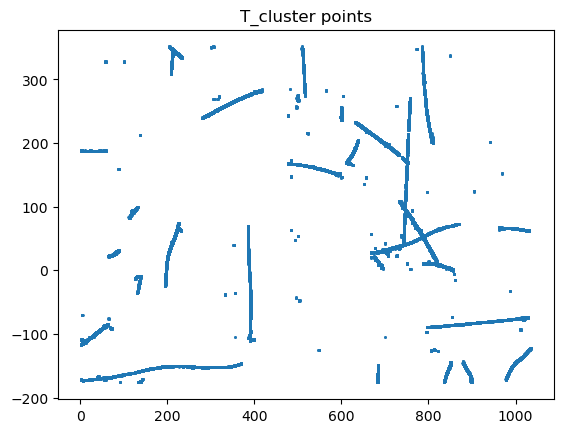

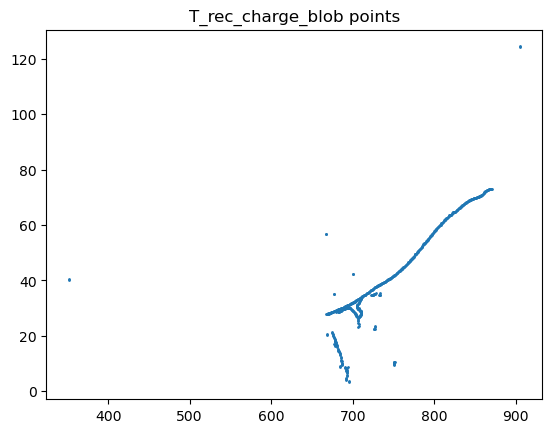

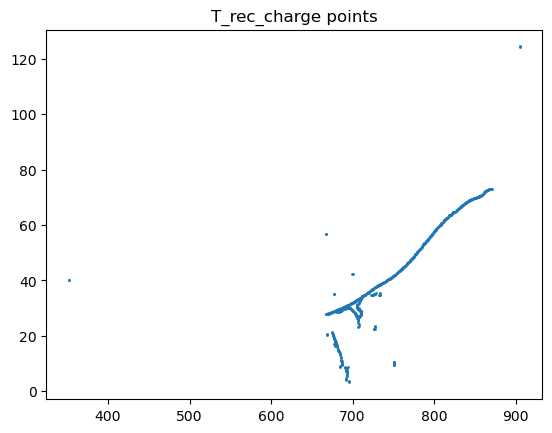

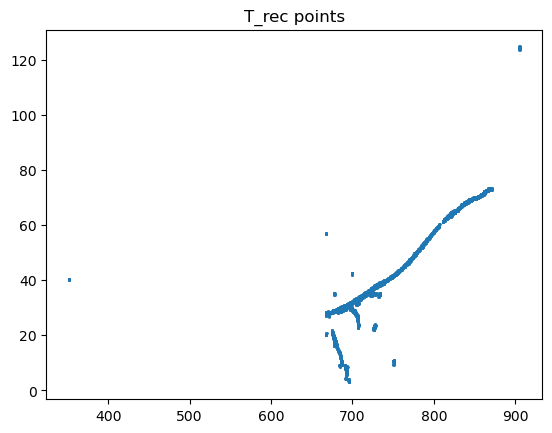

In [3]:
plt.figure()
plt.scatter(cosmic_spacepoints_df["z"], cosmic_spacepoints_df["x"], s=1)
plt.title("T_cluster points")
plt.show()

plt.figure()
plt.scatter(nu_trajectory_spacepoints_blob_df["z"], nu_trajectory_spacepoints_blob_df["x"], s=1)
plt.title("T_rec_charge_blob points")
plt.show()

plt.figure()
plt.scatter(t_rec_charge_df["z"], t_rec_charge_df["x"], s=1)
plt.title("T_rec_charge points")
plt.show()

plt.figure()
plt.scatter(track_shower_spacepoints_df["z"], track_shower_spacepoints_df["x"], s=1)
plt.title("T_rec points")
plt.show()



In [4]:
t_mc_df = f["TMC"].arrays(["mc_id", "mc_pdg"], library="np")
t_mc_df

id_to_pdg_map = {id: pdg for id, pdg in zip(t_mc_df["mc_id"][0], t_mc_df["mc_pdg"][0])}


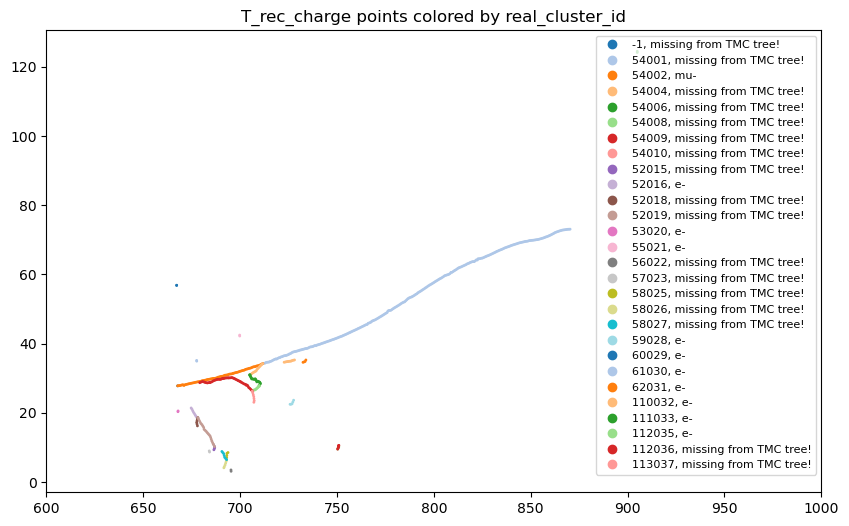

In [5]:
# mapping real_cluster_id to a cycle of 100 colors
unique_cluster_ids = t_rec_charge_df["real_cluster_id"].unique()

color_map = {}
for i, u in enumerate(unique_cluster_ids):
    color_map[u] = plt.cm.tab20(i % 20)

plt.figure(figsize=(10, 6))
plt.scatter(t_rec_charge_df["z"], t_rec_charge_df["x"], c=[color_map[cluster_id] for cluster_id in t_rec_charge_df["real_cluster_id"]], s=1)
for k, v in color_map.items():
    if k not in id_to_pdg_map:
        plt.plot([], [], 'o', color=v, label=f"{k}, missing from TMC tree!")
    else:
        pdg = id_to_pdg_map[k]
        particle_name =  Particle.from_pdgid(pdg).name
        plt.plot([], [], 'o', color=v, label=f"{k}, {particle_name}")
plt.legend(fontsize=8)
plt.title("T_rec_charge points colored by real_cluster_id")
plt.xlim(600, 1000)
plt.show()

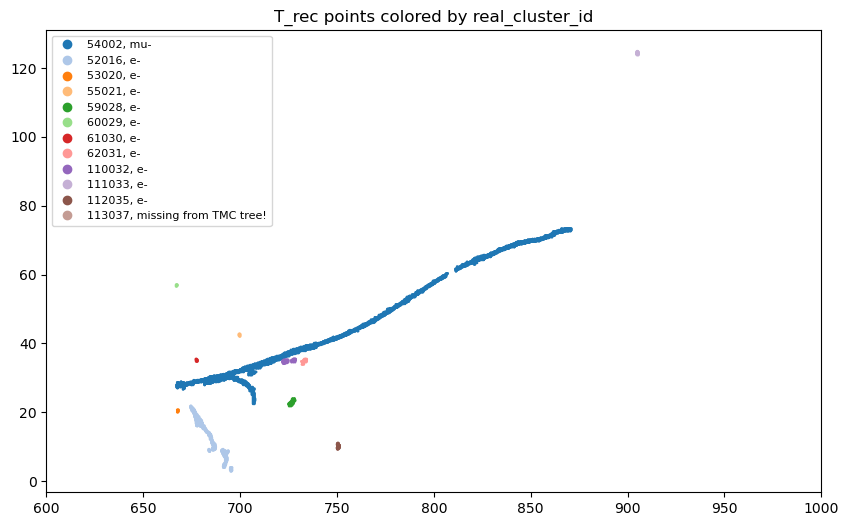

In [6]:
# mapping real_cluster_id to a cycle of 100 colors
unique_cluster_ids = track_shower_spacepoints_df["real_cluster_id"].unique()

color_map = {}
for i, u in enumerate(unique_cluster_ids):
    color_map[u] = plt.cm.tab20(i % 20)

plt.figure(figsize=(10, 6))
plt.scatter(track_shower_spacepoints_df["z"], track_shower_spacepoints_df["x"], c=[color_map[cluster_id] for cluster_id in track_shower_spacepoints_df["real_cluster_id"]], s=1)
for k, v in color_map.items():
    if k not in id_to_pdg_map:
        plt.plot([], [], 'o', color=v, label=f"{k}, missing from TMC tree!")
    else:
        pdg = id_to_pdg_map[k]
        particle_name =  Particle.from_pdgid(pdg).name
        plt.plot([], [], 'o', color=v, label=f"{k}, {particle_name}")
plt.legend(fontsize=8)
plt.title("T_rec points colored by real_cluster_id")
plt.xlim(600, 1000)
plt.show()

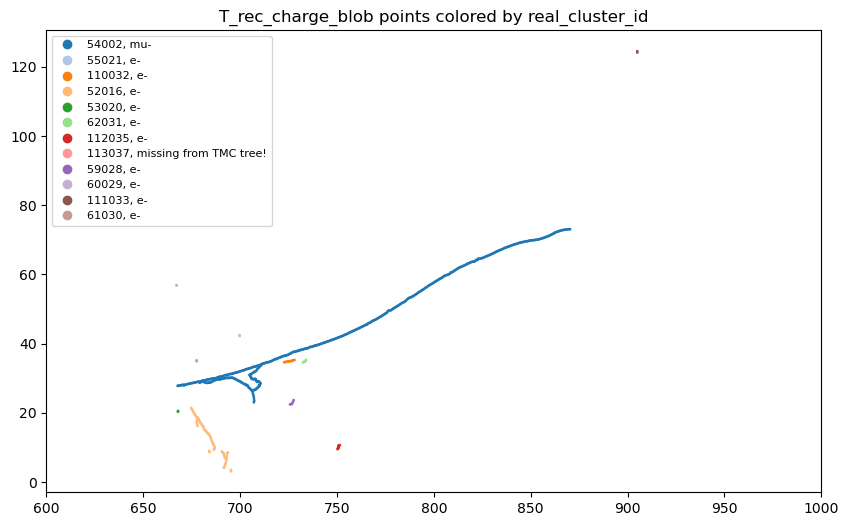

In [7]:
# mapping real_cluster_id to a cycle of 100 colors
unique_cluster_ids = nu_trajectory_spacepoints_blob_df["real_cluster_id"].unique()

color_map = {}
for i, u in enumerate(unique_cluster_ids):
    color_map[u] = plt.cm.tab20(i % 20)

plt.figure(figsize=(10, 6))
plt.scatter(nu_trajectory_spacepoints_blob_df["z"], nu_trajectory_spacepoints_blob_df["x"], c=[color_map[cluster_id] for cluster_id in nu_trajectory_spacepoints_blob_df["real_cluster_id"]], s=1)
for k, v in color_map.items():
    if k not in id_to_pdg_map:
        plt.plot([], [], 'o', color=v, label=f"{k}, missing from TMC tree!")
    else:
        pdg = id_to_pdg_map[k]
        particle_name =  Particle.from_pdgid(pdg).name
        plt.plot([], [], 'o', color=v, label=f"{k}, {particle_name}")
plt.legend(fontsize=8)
plt.title("T_rec_charge_blob points colored by real_cluster_id")
plt.xlim(600, 1000)
plt.show()


